In [40]:
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import datetime 
import numpy as np
import json
import tensorflow as tf
import jpype
from konlpy.tag import Okt
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
os.chdir("C:/Users/windd/pythondata")
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [66]:
# Data Storage

df_read = pd.read_excel('수료/가독성지수.xlsx')
rdata = pd.read_excel('수료/total_data1_titleadd.xlsx')
rdata2 = pd.read_excel('수료/total_data1.xlsx')
price_trend = pd.read_excel('수료/소비자물가상승률.xls')
GDP_ECO_trend = pd.read_excel('수료/국내총생산및경제성장률.xls')

In [67]:
# url 기준으로 변수 추가

rdata = rdata[['url','제목단어수']]
new_var = pd.merge(df_read, rdata, on='url')
total_data = pd.merge(rdata2, new_var, on='url')

In [68]:
total_data.columns

Index(['url', '제목', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액', '달성액', '달성률',
       '서포터수', '좋아요수', '요약글', '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수',
       '배송시작날짜', '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '과거성공프로젝트수', '앵콜펀딩여부', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '펀딩성공여부', '음절수', '단어수', '문장수', 'Strong',
       'Under', '가독성', '가독성2', '제목단어수'],
      dtype='object')

In [69]:
total_data2 = total_data[['메이커','펀딩시작날짜','펀딩마감날짜','펀딩시작요일','목표금액',
                          '글업데이트수','리워드종류수','이미지수','비디오수','배송시작날짜',
                          '마감배송차이','인스타존재여부','인스타팔로워수','와디즈팔로워수','과거프로젝트수',
                          '과거성공프로젝트수','앵콜펀딩여부','음절수','단어수','문장수','Strong','Under','가독성',
                          '가독성2','제목단어수','펀딩성공여부','달성률']]

In [70]:
# 가독성 0보다 작은 것 제거

total_data2_clean = total_data2[~((total_data2['가독성']<0) | (total_data2['가독성2']<0))]

In [71]:
# 수치 넘어가는 값은 없음

total_data2_clean[total_data2_clean['가독성2']>30]
total_data2_clean[total_data2_clean['가독성']>100]

,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,글업데이트수,댓글수,리워드종류수,...,음절수,단어수,문장수,Strong,Under,가독성,가독성2,제목단어수,펀딩성공여부,달성률


,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,글업데이트수,댓글수,리워드종류수,...,음절수,단어수,문장수,Strong,Under,가독성,가독성2,제목단어수,펀딩성공여부,달성률


In [72]:
# 음절수 1000개 이하는 제거 

total_data2_clean = total_data2_clean[~(total_data2_clean['음절수']<1000)]

In [73]:
# 18년도 데이터부터 활용

total_data2_clean = total_data2_clean[total_data2_clean['펀딩시작날짜'] > '2017-12-31']

In [74]:
total_data2_clean[total_data2_clean['펀딩성공여부']==1].Under.mean()

22.355709043816102

In [75]:
total_data2_clean[total_data2_clean['펀딩성공여부']==0].Under.mean()

16.701639344262293

In [76]:
total_data2_clean.index = list(range(len(total_data2_clean)))

In [52]:
# 나중에 할것 
# 달성률 높은 것 혹은 현실에서 성공한 것 관계찾아보기

total_data2_clean.sort_values('달성률', ascending = False)

,url,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,글업데이트수,댓글수,...,음절수,단어수,문장수,Strong,Under,가독성,가독성2,제목단어수,펀딩성공여부,달성률
1165,https://www.wadiz.kr/web/campaign/detail/29134,리톨로지,2019-01-22,2019-02-10,Tue,500000,2462,1220,8,442,...,4783,2710,157,46,17,40.000619,11.968194,10,1,47963
2771,https://www.wadiz.kr/web/campaign/detail/30100,CCC COMPANY,2019-02-18,2019-03-10,Mon,1000000,3346,1840,1,823,...,5277,2878,151,141,32,32.369906,13.479312,10,1,47747
5381,https://www.wadiz.kr/web/campaign/detail/29032,베이직스,2019-01-22,2019-02-21,Tue,5000000,6178,5312,30,1653,...,4206,2343,135,46,14,37.350737,12.361253,7,1,40466
4101,https://www.wadiz.kr/web/campaign/detail/30464,수면공감,2019-03-06,2019-04-01,Wed,1000000,5158,1774,17,819,...,6284,3461,156,101,44,30.711460,14.487291,9,1,34903
5480,https://www.wadiz.kr/web/campaign/detail/22929,착한텔레콤 커넥팅팟,2018-09-18,2018-10-31,Tue,500000,4481,2368,18,842,...,3257,1796,117,33,11,37.834383,11.795664,6,1,30174
4046,https://www.wadiz.kr/web/campaign/detail/33643,밸런스온팀(불스원),2019-04-11,2019-04-29,Thu,1000000,3811,1166,9,530,...,4461,2456,131,55,21,34.140948,13.154899,8,1,27559
4566,https://www.wadiz.kr/web/campaign/detail/39086,로얄테일즈,2019-07-08,2019-07-28,Mon,500000,502,350,15,42,...,5061,2744,143,25,12,31.323153,13.657412,8,1,26047
4642,https://www.wadiz.kr/web/campaign/detail/33730,쿼럼바이오(주),2019-05-07,2019-06-18,Tue,500000,3018,1205,11,190,...,3198,1903,106,72,20,46.442199,11.241556,9,1,24199
330,https://www.wadiz.kr/web/campaign/detail/30971,(주) 링거워터,2019-02-25,2019-03-24,Mon,2000000,6984,1726,12,443,...,4225,2336,141,98,2,37.007555,12.213314,6,1,23431
3320,https://www.wadiz.kr/web/campaign/detail/23571,HIDDEN MAKERS (프리미엄 패션),2018-10-02,2018-10-31,Tue,1000000,1271,853,14,592,...,4787,2643,135,171,56,33.736087,13.417486,7,1,23147


In [77]:
# 경제지표지수 전처리

GDP_ECO_trend = GDP_ECO_trend.reset_index()
GDP_ECO_trend.columns = ['펀딩시작월','명목GDP','실질GDP성장률']
GDP_ECO_trend.펀딩시작월 = ['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06',                       
                       '2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                      '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06']
del GDP_ECO_trend['명목GDP']

In [78]:
# 물가지수 전처리

price_trend = price_trend.T.reset_index()
price_trend = price_trend[['index','소비자물가','근원물가','생활물가']]
price_trend.columns = ['펀딩시작월','소비자물가','근원물가','생활물가']

# 날짜 변수로 변환

date = []

for i in range(len(price_trend)):
    a = price_trend.펀딩시작월[i].replace('\r\n','-')
    date.append(a.replace('월',''))
    
price_trend.펀딩시작월 = date

In [79]:
GDP_ECO_trend
price_trend

,펀딩시작월,실질GDP성장률
0,2018-01,2.8
1,2018-02,2.8
2,2018-03,2.8
3,2018-04,2.9
4,2018-05,2.9
5,2018-06,2.9
6,2018-07,2.1
7,2018-08,2.1
8,2018-09,2.1
9,2018-10,2.9


,펀딩시작월,소비자물가,근원물가,생활물가
0,2018-01,0.8,0.9,0.7
1,2018-02,1.3,1.1,1.3
2,2018-03,1.2,1.3,1.1
3,2018-04,1.5,1.4,1.5
4,2018-05,1.5,1.3,1.5
5,2018-06,1.5,1.2,1.5
6,2018-07,1.1,0.8,1.1
7,2018-08,1.4,0.9,1.5
8,2018-09,2.1,1.3,2.5
9,2018-10,2.0,1.2,2.6


In [80]:
# 추가 변수 운데이터에 병합

total_data2_clean['펀딩시작월'] = total_data2_clean.펀딩시작날짜.dt.strftime('%Y-%m')
total_data2_clean[['펀딩시작날짜','펀딩시작월']]

,펀딩시작날짜,펀딩시작월
0,2019-08-01,2019-08
1,2019-08-05,2019-08
2,2019-07-29,2019-07
3,2019-07-26,2019-07
4,2019-07-26,2019-07
5,2019-07-11,2019-07
6,2019-07-31,2019-07
7,2019-07-22,2019-07
8,2019-07-29,2019-07
9,2019-07-24,2019-07


In [57]:
total_data2_clean2 = pd.merge(total_data2_clean, price_trend, on='펀딩시작월')
total_data2_clean2 = pd.merge(total_data2_clean2, GDP_ECO_trend, on = '펀딩시작월')

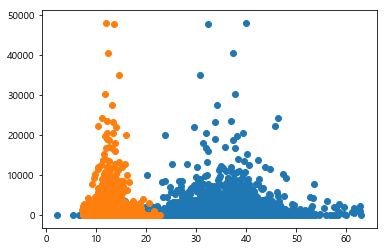

In [58]:
plt.scatter(total_data2_clean2.가독성, total_data2_clean2.달성률)
plt.scatter(total_data2_clean2.가독성2, total_data2_clean2.달성률)

In [59]:
total_data2_clean2.columns

Index(['url', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액', '서포터수', '좋아요수',
       '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수', '배송시작날짜', '마감배송차이',
       '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부',
       '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2', '제목단어수',
       '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가', '실질GDP성장률'],
      dtype='object')

In [60]:
total_plt = total_data2_clean2[['서포터수','좋아요수','글업데이트수','댓글수','리워드종류수','이미지수','비디오수',
                               '인스타팔로워수','와디즈팔로워수','과거프로젝트수','과거성공프로젝트수','Strong','Under',
                               '가독성','가독성2','제목단어수','소비자물가','실질GDP성장률','달성률']]

In [61]:
total_plt.columns[0]

'서포터수'

<Figure size 2880x2880 with 0 Axes>

Text(0.5,0,'좋아요수')

Text(0,0.5,'달성률')

Text(0.5,0,'글업데이트수')

Text(0,0.5,'달성률')

Text(0.5,0,'댓글수')

Text(0,0.5,'달성률')

Text(0.5,0,'리워드종류수')

Text(0,0.5,'달성률')

Text(0.5,0,'이미지수')

Text(0,0.5,'달성률')

Text(0.5,0,'비디오수')

Text(0,0.5,'달성률')

Text(0.5,0,'인스타팔로워수')

Text(0,0.5,'달성률')

Text(0.5,0,'와디즈팔로워수')

Text(0,0.5,'달성률')

Text(0.5,0,'과거프로젝트수')

Text(0,0.5,'달성률')

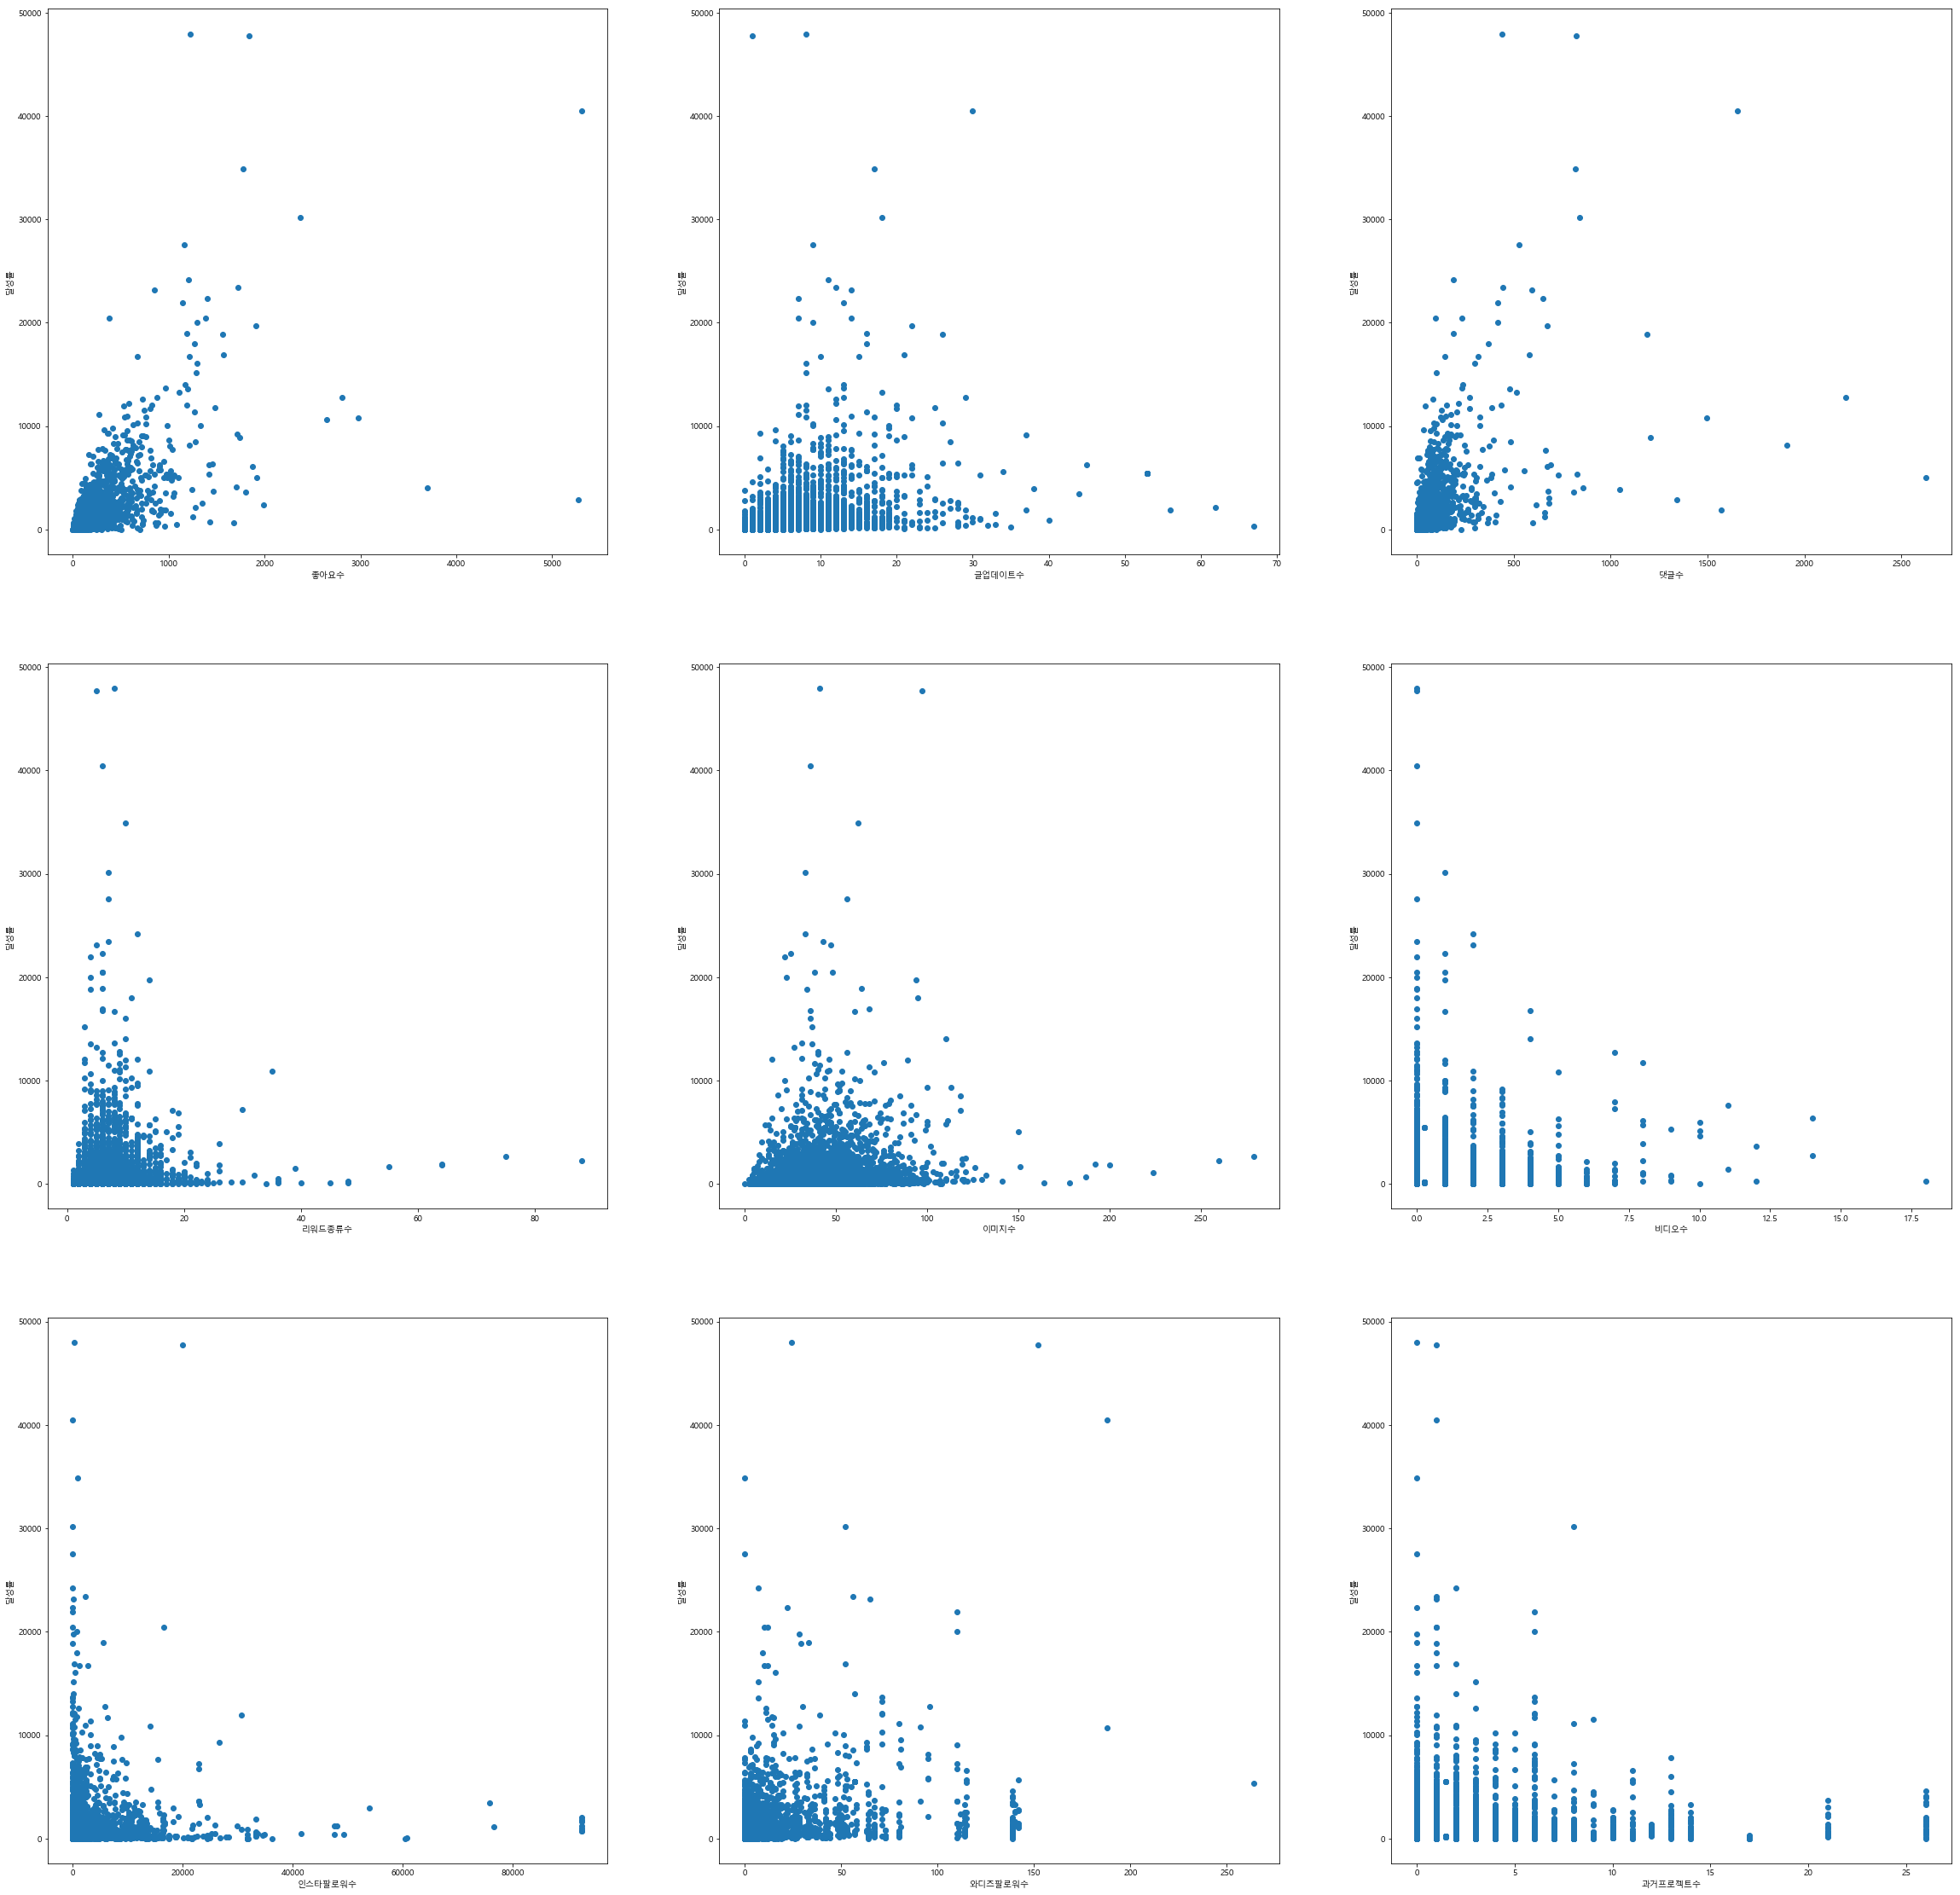

In [23]:
# 인스타팔로워수 지워야할 듯, 새로 모으던가

plt.figure(figsize=(40,40))

for i in range(1,10,1):
    plt.subplot(330+i)
    plt.scatter(total_plt[total_plt.columns[i]], total_plt.달성률)
    plt.xlabel(total_plt.columns[i])
    plt.ylabel('달성률')

<Figure size 2880x2880 with 0 Axes>

Text(0.5,0,'Strong')

Text(0,0.5,'달성률')

Text(0.5,0,'Under')

Text(0,0.5,'달성률')

Text(0.5,0,'가독성')

Text(0,0.5,'달성률')

Text(0.5,0,'가독성2')

Text(0,0.5,'달성률')

Text(0.5,0,'제목단어수')

Text(0,0.5,'달성률')

Text(0.5,0,'소비자물가')

Text(0,0.5,'달성률')

Text(0.5,0,'실질GDP성장률')

Text(0,0.5,'달성률')

Text(0.5,0,'달성률')

Text(0,0.5,'달성률')

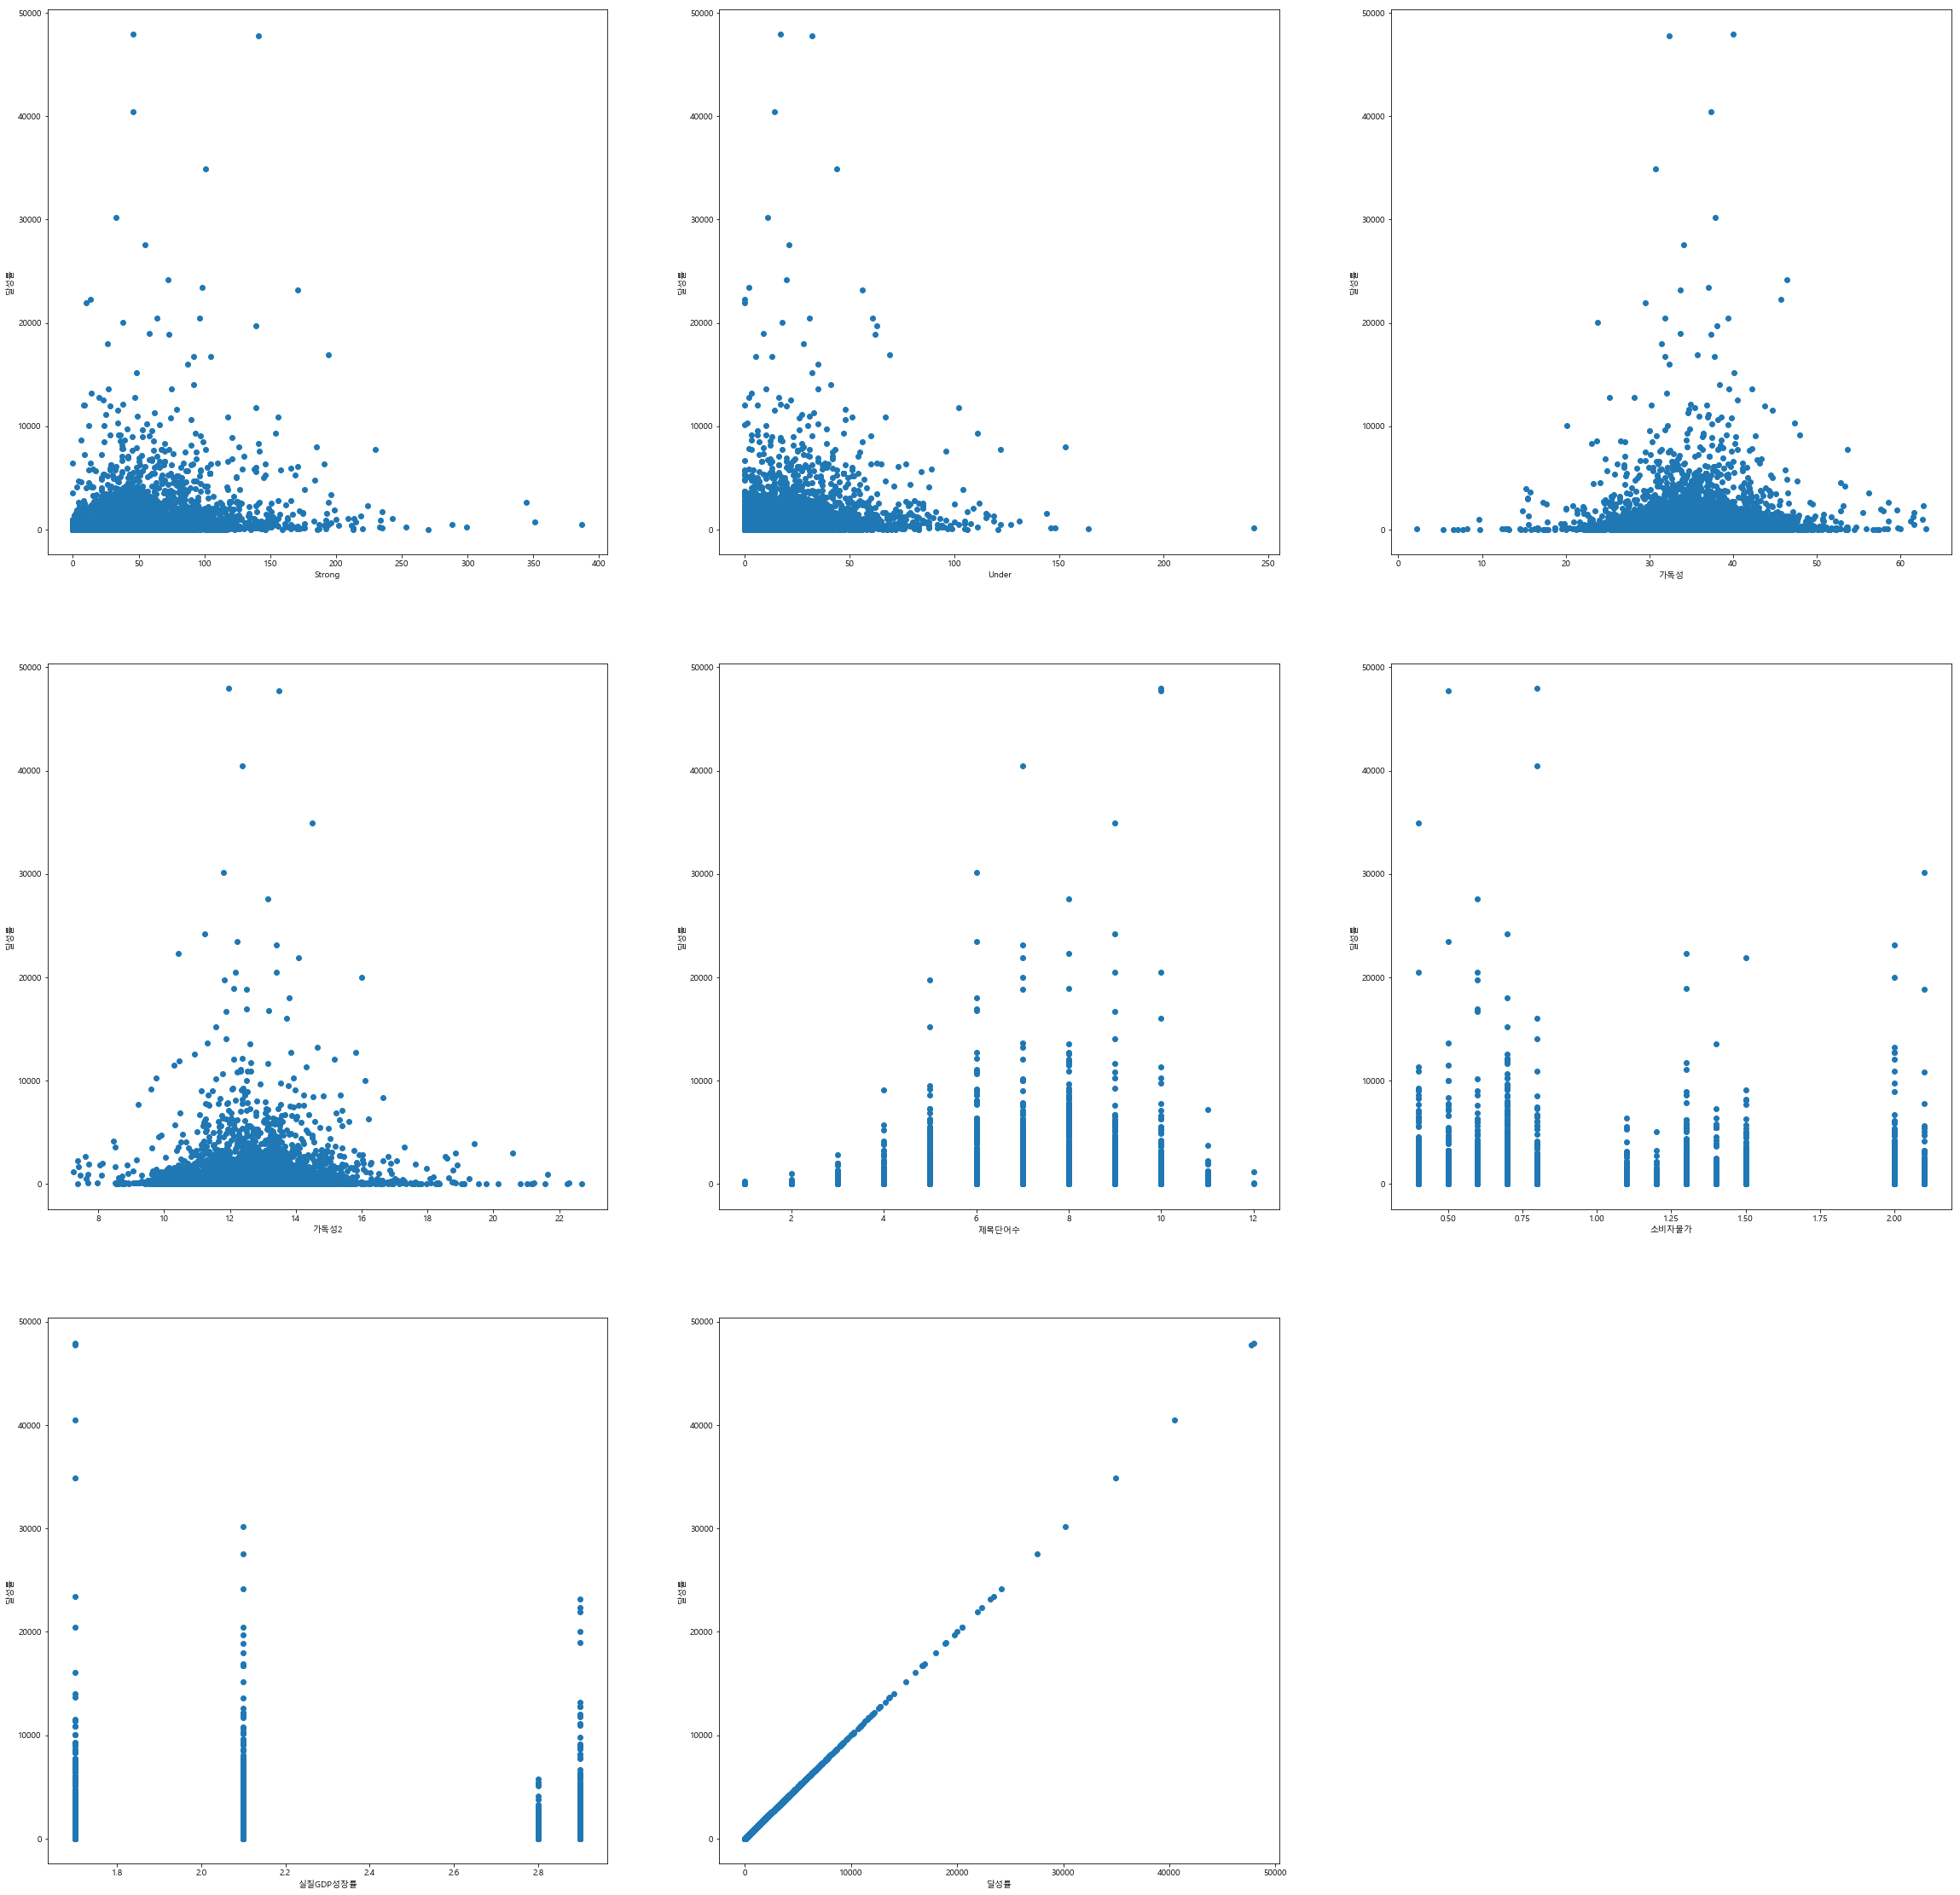

In [24]:
plt.figure(figsize=(40,40))

for i in range(1,9,1):
    plt.subplot(330+i)
    plt.scatter(total_plt[total_plt.columns[i+10]], total_plt.달성률)
    plt.xlabel(total_plt.columns[i+10])
    plt.ylabel('달성률')

In [25]:
total_data2_clean2.corr()

,목표금액,서포터수,좋아요수,글업데이트수,댓글수,리워드종류수,이미지수,비디오수,마감배송차이,인스타존재여부,...,Under,가독성,가독성2,제목단어수,펀딩성공여부,달성률,소비자물가,근원물가,생활물가,실질GDP성장률
목표금액,1.000000,0.030888,0.055127,0.026844,0.063542,-0.047090,-0.005915,0.068201,0.126611,0.038021,...,0.037825,-0.006476,0.022250,-0.049362,-0.186759,-0.064441,0.036875,0.035487,0.028257,0.043020
서포터수,0.030888,1.000000,0.849850,0.401984,0.844589,0.068734,0.154692,0.112833,0.058658,-0.013448,...,0.075166,-0.037027,0.021405,0.061807,0.191147,0.684552,-0.012594,0.002481,-0.011907,-0.002860
좋아요수,0.055127,0.849850,1.000000,0.458869,0.779185,0.079006,0.195395,0.139755,0.091003,-0.009496,...,0.091246,-0.029623,0.011941,0.060438,0.221092,0.699028,-0.002130,0.022775,-0.003147,0.002475
글업데이트수,0.026844,0.401984,0.458869,1.000000,0.445456,0.152005,0.245430,0.154581,0.063013,-0.060552,...,0.193089,-0.021268,0.015853,0.106087,0.403160,0.383568,0.065997,0.037393,0.054672,0.057715
댓글수,0.063542,0.844589,0.779185,0.445456,1.000000,0.058659,0.138270,0.135544,0.088594,-0.007124,...,0.076331,-0.031648,0.023843,0.049354,0.168928,0.568040,0.061561,0.070293,0.045577,0.062214
리워드종류수,-0.047090,0.068734,0.079006,0.152005,0.058659,1.000000,0.375206,0.075602,-0.017681,-0.085177,...,0.131924,0.046150,-0.034790,0.095381,0.152314,0.108813,0.013773,0.004418,0.016345,-0.011599
이미지수,-0.005915,0.154692,0.195395,0.245430,0.138270,0.375206,1.000000,0.139025,0.080445,-0.134331,...,0.296197,-0.026714,-0.003092,0.146298,0.197242,0.197119,-0.092768,-0.074527,-0.077361,-0.081423
비디오수,0.068201,0.112833,0.139755,0.154581,0.135544,0.075602,0.139025,1.000000,0.053100,0.015985,...,0.110905,-0.046477,0.053610,0.038774,0.092982,0.074143,0.015209,0.030910,0.012226,0.005102
마감배송차이,0.126611,0.058658,0.091003,0.063013,0.088594,-0.017681,0.080445,0.053100,1.000000,-0.027488,...,0.032162,-0.006989,-0.004255,-0.023930,-0.034248,0.046467,-0.111243,-0.079148,-0.102450,-0.121141
인스타존재여부,0.038021,-0.013448,-0.009496,-0.060552,-0.007124,-0.085177,-0.134331,0.015985,-0.027488,1.000000,...,-0.064850,0.046651,-0.020341,-0.053903,-0.083365,-0.034049,0.081757,0.076271,0.063063,0.070785


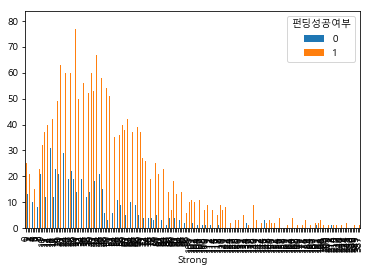

In [26]:
total_data2_clean2.pivot_table(index='Strong',columns= '펀딩성공여부', aggfunc='count',values='달성률').plot(kind='bar')